# Iris Dataset Analysis

# Import modules

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, auc, roc_auc_score, roc_curve,precision_recall_curve

# Loading the dataset

In [2]:
iris= pd.read_csv("iris_csv.csv")

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape                  

(150, 5)

In [5]:
iris.info()                    # to basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()                 # to display stats about data

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing the dataset

In [7]:
iris.isnull()                  # check for null values

,sepallength,sepalwidth,petallength,petalwidth,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
iris.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [9]:
dt=iris.drop_duplicates(subset="class")              #drops duplicate values from class feature
dt

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [10]:
iris.value_counts("class")                   # to display no. of samples on each class

class
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64

In [11]:
iris.groupby("class").agg(["mean","median"])
iris.groupby("class").agg([np.mean,np.median])

sepallength        sepalwidth        petallength         \
                       mean median       mean median        mean median   
class                                                                     
Iris-setosa           5.006    5.0      3.418    3.4       1.464   1.50   
Iris-versicolor       5.936    5.9      2.770    2.8       4.260   4.35   
Iris-virginica        6.588    6.5      2.974    3.0       5.552   5.55   

                petalwidth         
                      mean median  
class                              
Iris-setosa          0.244    0.2  
Iris-versicolor      1.326    1.3  
Iris-virginica       2.026    2.0

# Exploratory Data Analysis

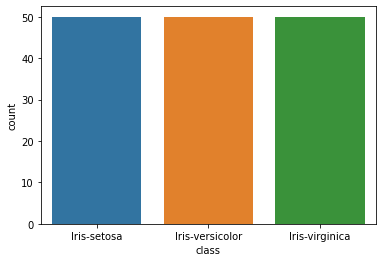

In [12]:
sns.countplot(x='class',data=iris,)
plt.show()

<AxesSubplot:xlabel='class', ylabel='sepalwidth'>

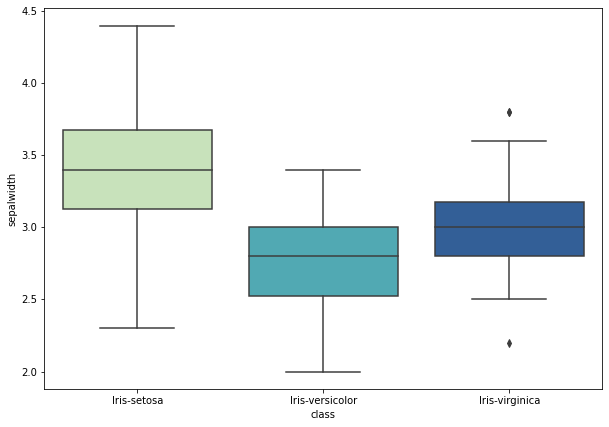

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='class',y='sepalwidth',data=iris ,palette='YlGnBu')

# Coorelation Matrix

In [15]:
iris.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

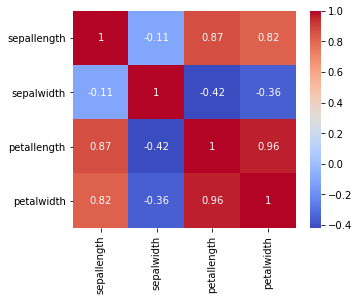

In [16]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

<AxesSubplot:xlabel='petalwidth', ylabel='petallength'>

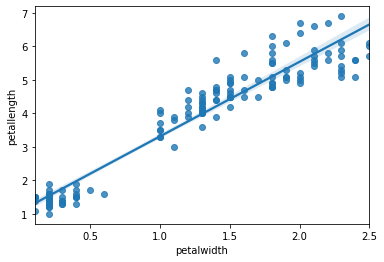

In [17]:
sns.regplot(x='petalwidth', y='petallength', data=iris)

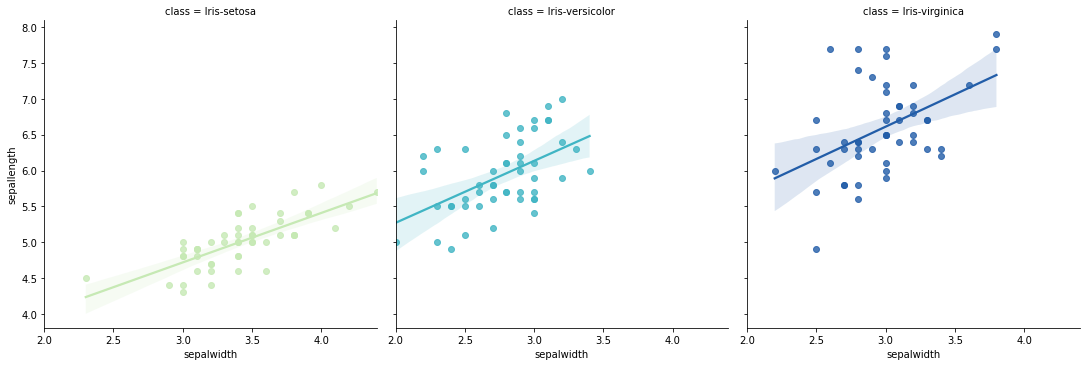

In [18]:
sns.lmplot(x = 'sepalwidth', y = 'sepallength', data = iris, col = 'class', hue = 'class', palette = 'YlGnBu')

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

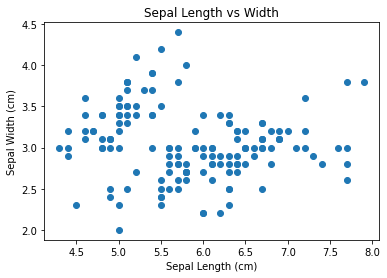

In [19]:
ax = plt.axes()
ax.scatter(iris.sepallength, iris.sepalwidth)
ax.set(xlabel='Sepal Length (cm)',ylabel='Sepal Width (cm)',title='Sepal Length vs Width')

[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

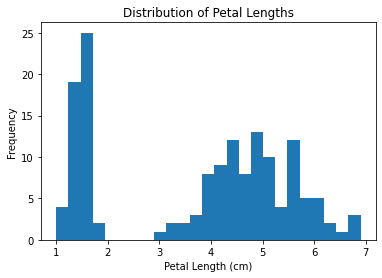

In [20]:
ax=plt.axes()
ax.hist(iris.petallength, bins=25)
ax.set(xlabel='Petal Length (cm)', ylabel='Frequency',title='Distribution of Petal Lengths')

[Text(0.5, 0, 'Petal width (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Widths')]

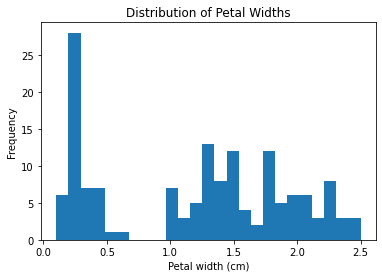

In [21]:
ax = plt.axes()
ax.hist(iris.petalwidth, bins=25)
ax.set(xlabel='Petal width (cm)', ylabel='Frequency',title='Distribution of Petal Widths')

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sepal Lengths')]

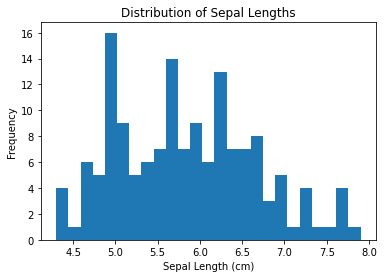

In [22]:
ax = plt.axes()
ax.hist(iris.sepallength, bins=25)
ax.set(xlabel='Sepal Length (cm)', ylabel='Frequency',title='Distribution of Sepal Lengths')

[Text(0.5, 0, 'Sepal width (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sepal Widths')]

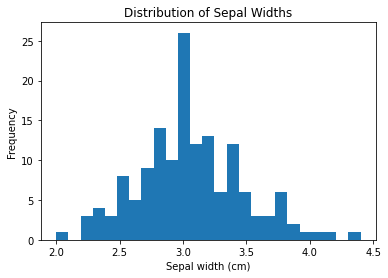

In [23]:
ax = plt.axes()
ax.hist(iris.sepalwidth, bins=25);
ax.set(xlabel='Sepal width (cm)', ylabel='Frequency',title='Distribution of Sepal Widths')

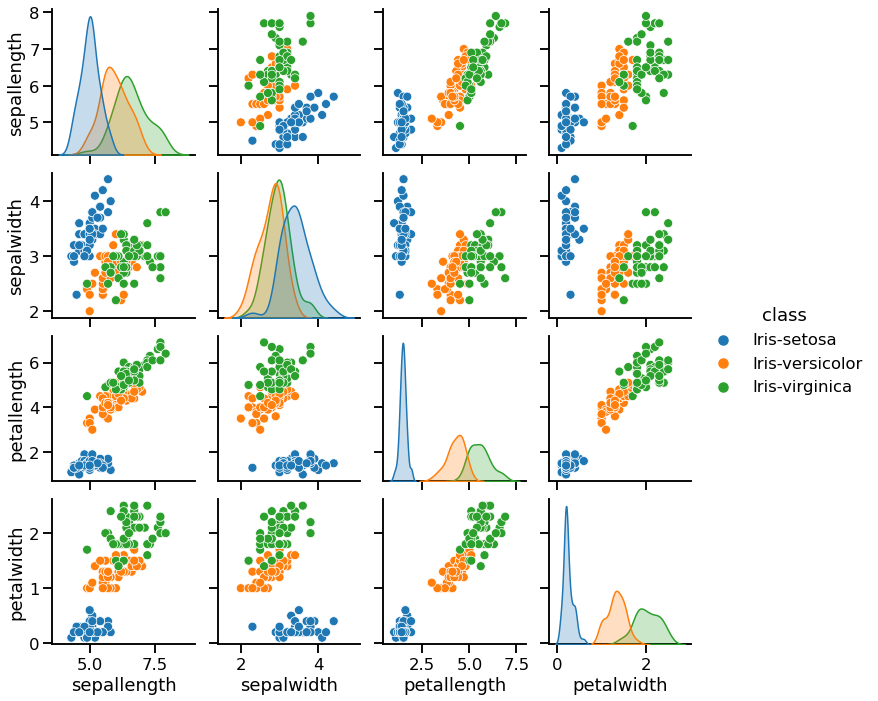

In [24]:
sns.set_context('talk')
sns.pairplot(iris, hue='class')

# Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
iris['class'] = le.fit_transform(iris['class'])
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [27]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = iris.drop(columns=['class'])
Y = iris['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 65)

In [28]:
def model_assess(model,title):
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return preds

In [29]:
# Function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [30]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return (roc_auc_score(y_test, y_pred, average=average))

In [31]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_predict = model_assess(lr, "Logistic Regression")

Accuracy Logistic Regression : 0.97778 



In [32]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



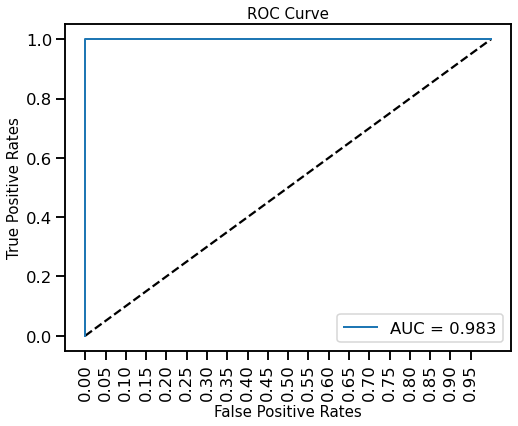

In [33]:
lr_pred_test_prob = lr.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_pred_test_prob, pos_label=1)
lr_auc = multiclass_roc_auc_score(y_test, lr_predict, average="macro")
plot_roc_curve(fpr=lr_fpr, tpr=lr_tpr, label="AUC = %.3f" % lr_auc)

In [34]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_predict = model_assess(knn, "k-nearest neighbours")

Accuracy k-nearest neighbours : 0.93333 



In [35]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.79      0.88        14
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



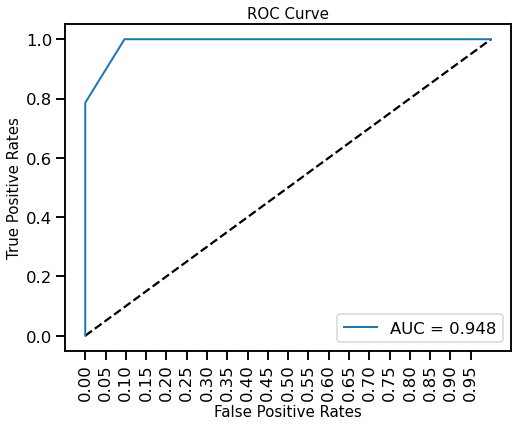

In [36]:
knn_pred_test_prob = knn.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred_test_prob, pos_label=1)
knn_auc = multiclass_roc_auc_score(y_test, knn_predict, average="macro")
plot_roc_curve(fpr=knn_fpr, tpr=knn_tpr, label="AUC = %.3f" % knn_auc)

In [37]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_predict = model_assess(dt, "Decision Tree")

Accuracy Decision Tree : 0.93333 



In [38]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.79      0.88        14
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



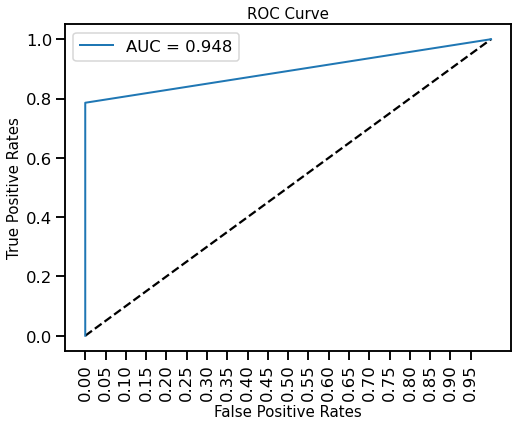

In [39]:
dt_pred_test_prob = dt.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_pred_test_prob, pos_label=1)
dt_auc = multiclass_roc_auc_score(y_test, dt_predict, average="macro")
plot_roc_curve(fpr=dt_fpr, tpr=dt_tpr, label="AUC = %.3f" % dt_auc)

In [40]:
# Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
svm = SVC(decision_function_shape="ovo", probability=True)
svm_predict = model_assess(svm, "Support Vector Machine")

Accuracy Support Vector Machine : 0.95556 



In [41]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



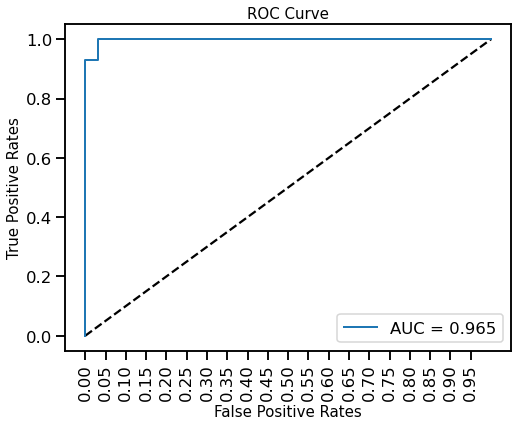

In [42]:
svm_pred_test_prob = svm.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_pred_test_prob, pos_label=1)
svm_auc = multiclass_roc_auc_score(y_test, svm_predict, average="macro")
plot_roc_curve(fpr=svm_fpr, tpr=svm_tpr, label="AUC = %.3f" % svm_auc)

###  Logistic regression model performed the best after analyzing the Iris dataset and training various machine learning models, with an accuracy of 97.7% and an AUC score of 98.3%